In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
bls_df = pd.read_csv("BLSDataset_2016.csv")

us_df = bls_df[bls_df["area_type"] == 1]
us_df.drop(["own_code","annual",'Unnamed: 29', "occ code","hourly", "area_type", "area", "naics", "naics_title"], axis = 1, inplace=True)
us_df.dropna(axis=1, inplace=True)

state_df = bls_df[(bls_df["area_type"] == 2) & (bls_df["area_title"] != "District of Columbia")]
state_df.drop(["own_code","annual",'Unnamed: 29', "occ code","hourly", "area_type", "area", "naics", "naics_title"], axis = 1, inplace=True)
state_df.dropna(axis=1, inplace=True)

In [5]:
us_aavg = us_df[us_df["group"] == "major"]
us_aavg.drop_duplicates(["occ title"], keep="first", inplace=True) 
us_aavg[' a_mean '] = us_aavg[' a_mean '].str.replace(',', '')  #remove comma in numbers
us_aavg[' a_mean '] = us_aavg[' a_mean '].str.replace('*', '0')
us_aavg[' a_mean '] = us_aavg[' a_mean '].astype(int)           #convert string to integers
us_aavg.sort_values(" a_mean ", ascending = False, inplace=True)
us_aavg[["occ title", " a_mean "]].head(10)

,occ title,a_mean
1,Management Occupations,118020
319,Legal Occupations,105980
128,Computer and Mathematical Occupations,87880
161,Architecture and Engineering Occupations,84300
493,Healthcare Practitioners and Technical Occupat...,79160
70,Business and Financial Operations Occupations,75070
221,"Life, Physical, and Social Science Occupations",72930
431,"Arts, Design, Entertainment, Sports, and Media...",58390
335,"Education, Training, and Library Occupations",54520
949,Construction and Extraction Occupations,48900


In [6]:
#Total Employment
state_employ = state_df[state_df["group"] == "total"]
state_employ["tot_emp"] = state_employ['tot_emp'].str.replace(',', '')  #remove comma in numbers
state_employ["tot_emp"] = state_employ["tot_emp"].astype(int)  
state_employ.sort_values("tot_emp", ascending=False, inplace=True)
state_employ[["area_title", "tot_emp"]].head(10)

,area_title,tot_emp
184563,California,15966580
184602,Texas,11745250
184591,New York,9097650
184568,Florida,8222030
184572,Illinois,5903820
184597,Pennsylvania,5747020
184594,Ohio,5337890
184592,North Carolina,4231020
184569,Georgia,4214410
184581,Michigan,4212090


In [7]:
#State Average Annual Income
state_aavg = state_df[state_df["group"] == "total"]
state_aavg[" a_mean "] = state_aavg[' a_mean '].str.replace(',', '')  #remove comma in numbers
state_aavg[" a_mean "] = state_aavg[" a_mean "].astype(int)     
state_aavg.sort_values(" a_mean ", ascending=False, inplace=True)
state_aavg[["area_title", " a_mean "]].head(10)

,area_title,a_mean
184580,Massachusetts,60840
184591,New York,58910
184565,Connecticut,57960
184563,California,56840
184560,Alaska,56710
184579,Maryland,56120
184589,New Jersey,56030
184606,Washington,55810
184605,Virginia,53090
184564,Colorado,52710


In [9]:
#California Occupation with the highest average annual income
cali_df = state_df[(state_df["area_title"] == "California") & (state_df["group"] == "major")] 
cali_df[' a_mean '] = cali_df[' a_mean '].str.replace(',', '') 
cali_df = cali_df[cali_df[' a_mean '] != "*"]                  # remove N/A observations
cali_df[' a_mean '] = cali_df[' a_mean '].astype(int)          
cali_df.sort_values(" a_mean ", ascending=False, inplace=True)
cali_df[["occ title", " a_mean "]].head(10)

,occ title,a_mean
184614,Management Occupations,130200
192940,Legal Occupations,125150
187893,Computer and Mathematical Occupations,102970
188761,Architecture and Engineering Occupations,98370
198039,Healthcare Practitioners and Technical Occupat...,94480
186316,Business and Financial Operations Occupations,82910
190316,"Life, Physical, and Social Science Occupations",80960
196296,"Arts, Design, Entertainment, Sports, and Media...",74610
193398,"Education, Training, and Library Occupations",61890
201825,Protective Service Occupations,56810


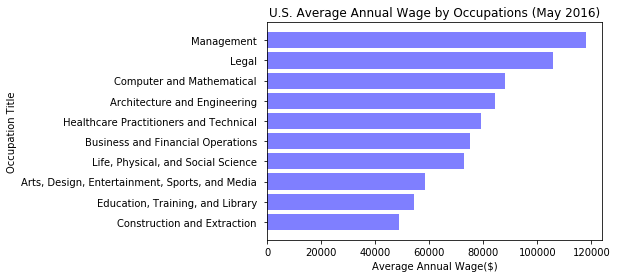

In [10]:
fig, ax = plt.subplots()

# Example data
plt.figure(figsize=(100, 100))
y_pos = np.arange(len(us_top10[' a_mean ']))
yticks = us_top10['occ title'].str.replace('Occupations', '')

ax.barh(y_pos, us_top10[' a_mean '], color = "blue", alpha = .5)
ax.set_yticks(y_pos)
ax.set_yticklabels(yticks)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Annual Wage($)')
ax.set_ylabel('Occupation Title')
ax.set_title('U.S. Average Annual Wage by Occupations (May 2016)')

plt.show()

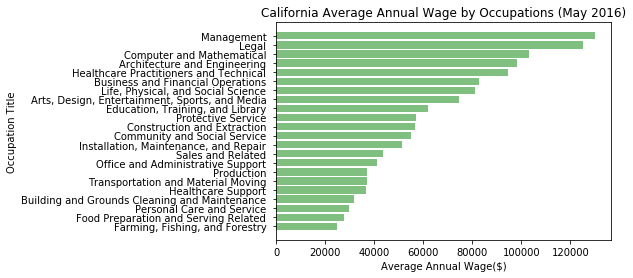

In [14]:
fig, ax = plt.subplots()

# Example data
y_pos = np.arange(len(cali_df[' a_mean ']))
yticks = cali_df['occ title'].str.replace('Occupations', '')
ax.barh(y_pos, cali_df[' a_mean '],color = 'green', alpha = .5)
ax.set_yticks(y_pos)
ax.set_yticklabels(yticks)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Average Annual Wage($)')
ax.set_ylabel('Occupation Title')
ax.set_title('California Average Annual Wage by Occupations (May 2016)')

plt.show()

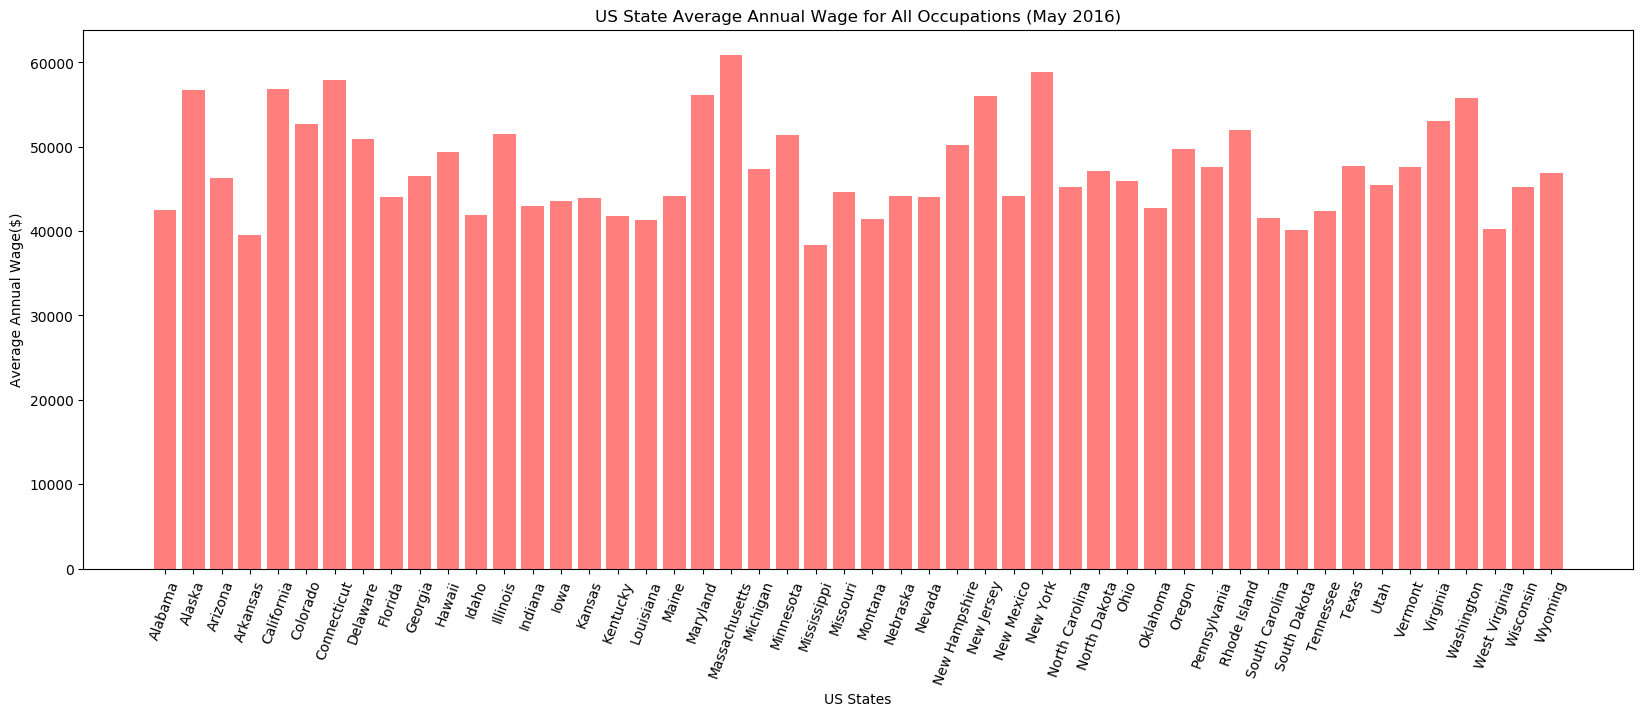

In [436]:
x = np.arange(50)
plt.figure(figsize=(20, 7))
plt.bar(x, state_aavg[" a_mean "], color = "red", alpha = .5)
plt.xlabel("US States")
plt.ylabel("Average Annual Wage($)")
plt.title("US State Average Annual Wage for All Occupations (May 2016)")
plt.xticks(x, state_aavg["area_title"], rotation = 70)
plt.show()

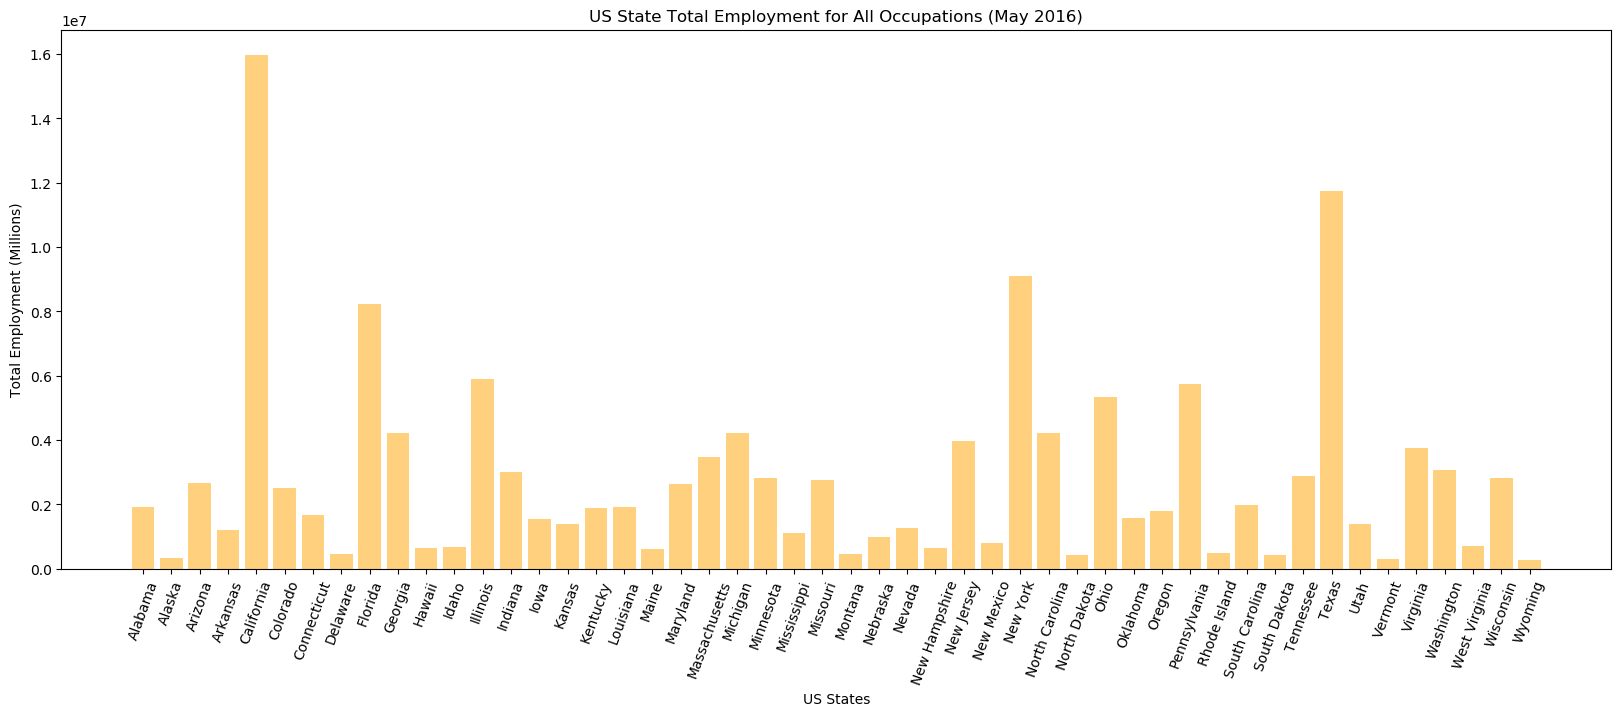

In [430]:
plt.figure(figsize=(20, 7))
plt.bar(x, state_employ["tot_emp"], color ="orange", alpha = .5)
plt.xlabel("US States")
plt.ylabel("Total Employment (Millions)")
plt.title("US State Total Employment for All Occupations (May 2016)")
plt.xticks(x, state_employ["area_title"], rotation = 70)
plt.show()